In [11]:
import pandas as pd
import numpy as np

file_path = "../data/raw/superstore_raw.xlsx.xls"

df = pd.read_excel(file_path)

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
# Check missing values in each column
df.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
# Clean up column names: lower case, underscores instead of spaces
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)

df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [20]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [21]:
df[['order_date', 'ship_date']].head()

,order_date,ship_date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [22]:
# Date-based features
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)
df['order_dayofweek'] = df['order_date'].dt.day_name()

# Profit margin (profit / sales)
df['profit_margin'] = df['profit'] / df['sales']

df[['sales', 'profit', 'profit_margin']].head()


,sales,profit,profit_margin
0,261.9600,41.9136,0.1600
1,731.9400,219.5820,0.3000
2,14.6200,6.8714,0.4700
3,957.5775,-383.0310,-0.4000
4,22.3680,2.5164,0.1125


In [23]:
sales_by_category = (
    df.groupby('category')['sales']
      .sum()
      .sort_values(ascending=False)
)
sales_by_category


category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64

In [24]:
sales_by_region = (
    df.groupby('region')['sales']
      .sum()
      .sort_values(ascending=False)
)
sales_by_region


region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64

In [25]:
monthly_sales = (
    df.groupby('order_month')['sales']
      .sum()
      .reset_index()
      .sort_values('order_month')
)
monthly_sales.head()


,order_month,sales
0,2014-01,14236.895
1,2014-02,4519.892
2,2014-03,55691.009
3,2014-04,28295.345
4,2014-05,23648.287


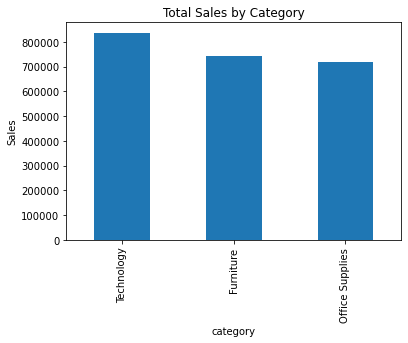

In [26]:
import matplotlib.pyplot as plt

# Sales by category
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()


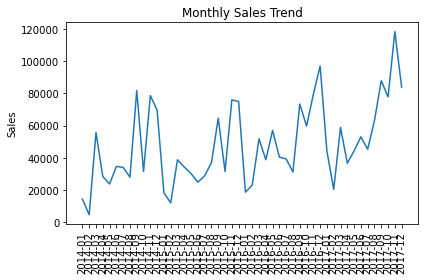

In [27]:
plt.plot(monthly_sales['order_month'], monthly_sales['sales'])
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [28]:
output_path = "../data/processed/superstore_clean.csv"
df.to_csv(output_path, index=False)
output_path


'../data/processed/superstore_clean.csv'